In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import glob
import os

data_preprocessed/raw/2020_02_04_20_48_03_SpecCube.dat.npz data_preprocessed/augmented/2020_02_04_20_48_03_SpecCube.dat.npz
(9151, 93) (9151, 2, 93)


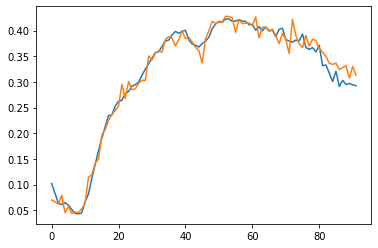

In [18]:
#check if all is okay

paths_raw = glob.glob(os.path.join('data_preprocessed/raw', '*.npz'))
paths_aug = glob.glob(os.path.join('data_preprocessed/augmented', '*.npz'))

print(paths_raw[0], paths_aug[0])

raw = np.load(paths_raw[0])
aug = np.load(paths_aug[0])

print(raw['ill_data'].shape, aug['ill_data'].shape)

plt.plot(raw['ill_data'][0, :-1])
plt.plot(aug['ill_data'][1][0, :-1])
#plt.plot(savgol_filter(aug['ill_data'][0][0, :-1], 5, 2))
#plt.plot(aug['ill_data'][0][1, :-1])